In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv("mobiles_dataset.csv")

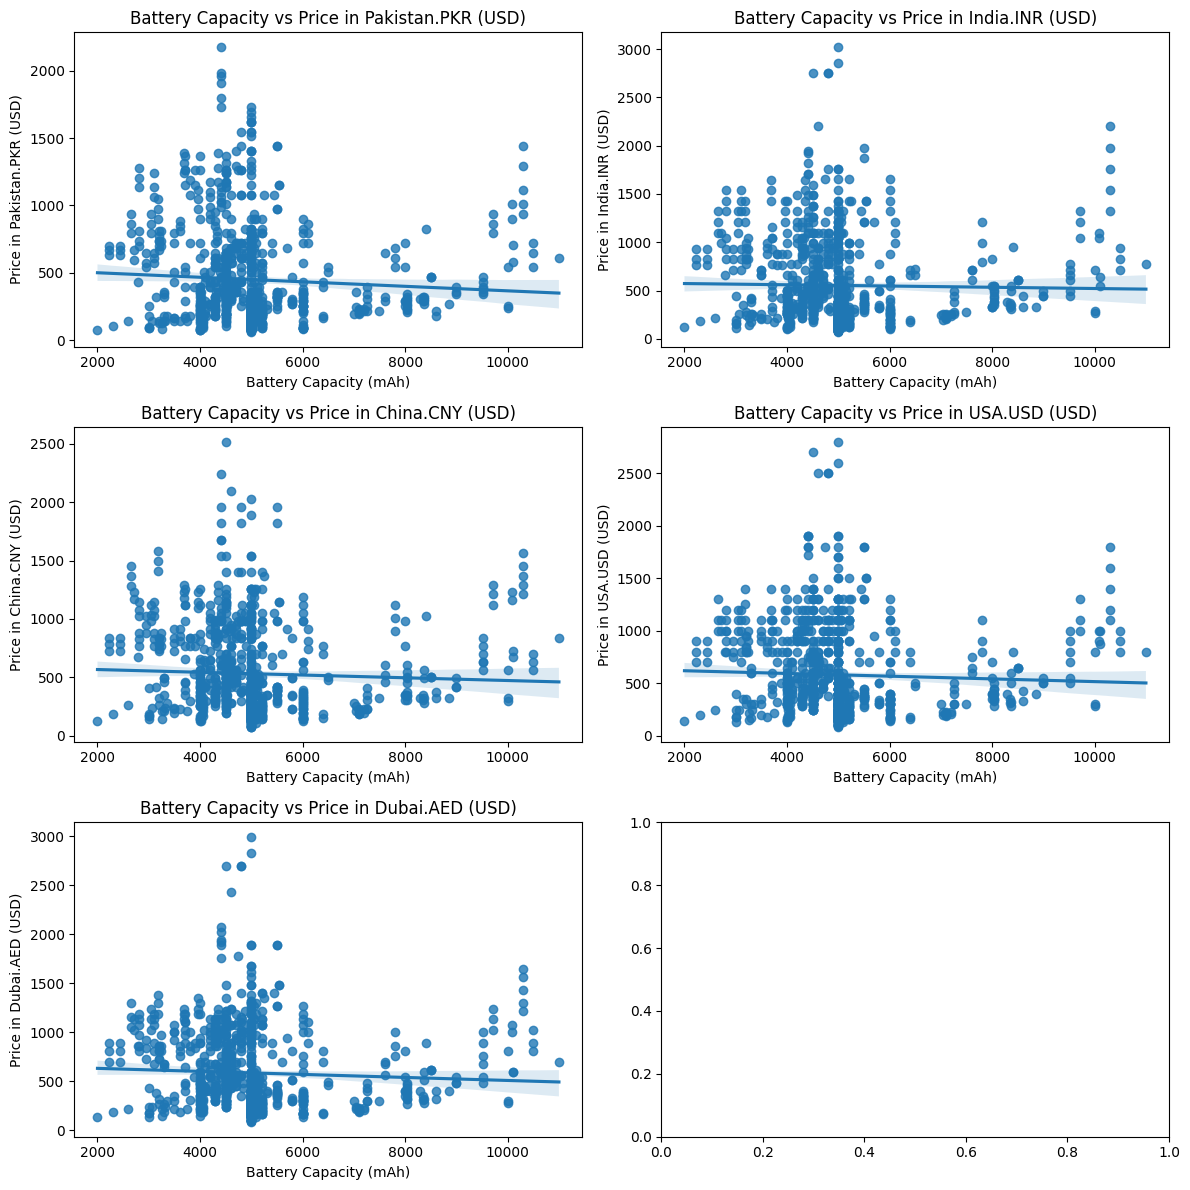

Correlation between Battery Capacity and Price in Different Currencies: {'Pakistan.PKR': -0.06091272494136732, 'India.INR': -0.019054291127727607, 'China.CNY': -0.04104334046511195, 'USA.USD': -0.04113680436766317, 'Dubai.AED': -0.048907755147656384}


In [117]:
## Part 1.1

df["Battery.Capacity.mAh"] = pd.to_numeric(df["Battery.Capacity.mAh"], errors='coerce')

exchange_rates = {
    "Pakistan.PKR": 0.0036,
    "India.INR": 0.011,
    "China.CNY": 0.14,
    "USA.USD": 1.0,
    "Dubai.AED": 0.27
}

for country, rate in exchange_rates.items():
    price_col = f"Launched.Price.{country}"  
    new_col = f"Price_{country}_USD"
    
    if price_col in df.columns:  
        df[new_col] = df[price_col] * rate

fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()
currencies = list(exchange_rates.keys())

for i, country in enumerate(currencies):
    price_col = f"Price_{country}_USD"
    if price_col in df.columns:
        sns.regplot(x=df["Battery.Capacity.mAh"], y=df[price_col], ax=axes[i])
        axes[i].set_title(f"Battery Capacity vs Price in {country} (USD)")
        axes[i].set_xlabel("Battery Capacity (mAh)")
        axes[i].set_ylabel(f"Price in {country} (USD)")

plt.tight_layout()
plt.show()

correlations = {country: df["Battery.Capacity.mAh"].corr(df[f"Price_{country}_USD"]) 
                for country in currencies if f"Price_{country}_USD" in df.columns}

print("Correlation between Battery Capacity and Price in Different Currencies:", correlations)


# Battery capacity does not significantly influence the launch price of smartphones. 
# The correlation values are weak across all countries, suggesting that other factors 
#  play a much bigger role in determining the price.

Correlation between RAM and Price in Different Currencies: {'Pakistan.PKR': 0.40897803074351574, 'India.INR': 0.41619276442172676, 'China.CNY': 0.4216851813015541, 'USA.USD': 0.46195036256752625, 'Dubai.AED': 0.47300723092080826}


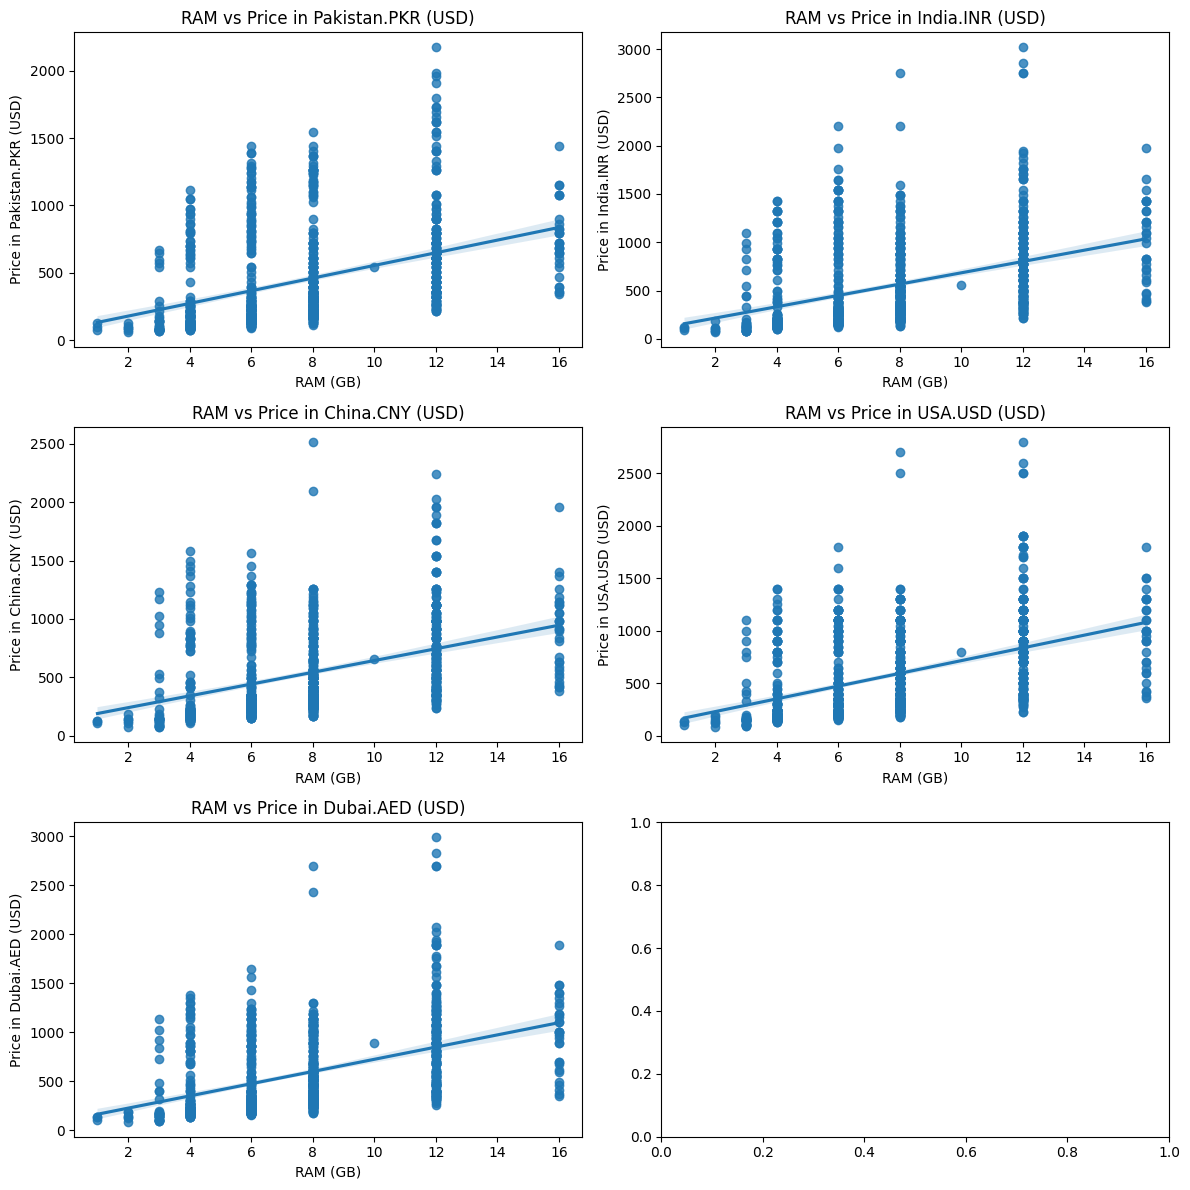

In [118]:
#Part1.2

df["RAM"] = df["RAM"].astype(str).str.extract("(\d+)").astype(float)

exchange_rates = {
    "Pakistan.PKR": 0.0036,
    "India.INR": 0.011,
    "China.CNY": 0.14,
    "USA.USD": 1.0,
    "Dubai.AED": 0.27
}

for country, rate in exchange_rates.items():
    price_col = f"Launched.Price.{country}"
    usd_col = f"Price_{country}_USD"
    
    if price_col in df.columns:
        df[usd_col] = pd.to_numeric(df[price_col], errors='coerce') * rate

ram_correlations = {country: df["RAM"].corr(df[f"Price_{country}_USD"]) 
                    for country in exchange_rates.keys() if f"Price_{country}_USD" in df.columns}

print("Correlation between RAM and Price in Different Currencies:", ram_correlations)

fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()
currencies = list(exchange_rates.keys())

for i, country in enumerate(currencies):
    price_col = f"Price_{country}_USD"
    
    if price_col in df.columns and df[price_col].notna().sum() > 0:
        sns.regplot(x=df["RAM"], y=df[price_col], ax=axes[i])
        axes[i].set_title(f"RAM vs Price in {country} (USD)")
        axes[i].set_xlabel("RAM (GB)")
        axes[i].set_ylabel(f"Price in {country} (USD)")

plt.tight_layout()
plt.show()



#RAM Size positively influences price
#All correlation values are positive, meaning that smartphones with higher RAM tend to have higher launch prices.
#The correlation is moderate in Pakistan, India, and China, while it's slightly stronger in USA and Dubai.

In [119]:
##Part1.3

exchange_rates = {
    "Pakistan.PKR": 0.0036,
    "India.INR": 0.011,
    "China.CNY": 0.14,
    "USA.USD": 1.0,
    "Dubai.AED": 0.27
}

for country, rate in exchange_rates.items():
    original_col = f"Launched.Price.{country}"
    new_col = f"Price_{country}_USD"
    
    if original_col in df.columns:
        df[new_col] = df[original_col] * rate

price_cols = [
    "Price_Pakistan.PKR_USD",
    "Price_India.INR_USD",
    "Price_China.CNY_USD",
    "Price_USA.USD_USD",
    "Price_Dubai.AED_USD"
]


apple_df = df[df["Company.Name"].str.contains("Apple", case=False, na=False)].copy()

apple_df["Price_SD"] = apple_df[price_cols].std(axis=1, skipna=True)
apple_df["Price_CV"] = apple_df["Price_SD"] / apple_df[price_cols].mean(axis=1, skipna=True)

apple_avg_cv = apple_df["Price_CV"].mean()

apple_mean_prices = apple_df[price_cols].mean()
highest_markup_country = apple_mean_prices.idxmax()

other_brands_df = df[~df["Company.Name"].str.contains("Apple", case=False, na=False)].copy()
other_brands_df["Price_SD"] = other_brands_df[price_cols].std(axis=1, skipna=True)
other_brands_df["Price_CV"] = other_brands_df["Price_SD"] / other_brands_df[price_cols].mean(axis=1, skipna=True)
other_avg_cv = other_brands_df["Price_CV"].mean()

print(f" Apple Price Coefficient of Variation (Avg): {apple_avg_cv:.4f}")
print(f" Other Brands Price Coefficient of Variation (Avg): {other_avg_cv:.4f}")
print(f" Country with Highest Apple Markup: {highest_markup_country}")

brand_cv = df.groupby("Company.Name")[price_cols].std().mean(axis=1)
most_stable_brand = brand_cv.idxmin()

print(f" Brand with Most Stable Pricing: {most_stable_brand}")


 Apple Price Coefficient of Variation (Avg): 0.1164
 Other Brands Price Coefficient of Variation (Avg): 0.1704
 Country with Highest Apple Markup: Price_India.INR_USD
 Brand with Most Stable Pricing: Poco


In [120]:
#Part1.4
budget_threshold = 300
mid_range_threshold = 700

price_column = "Price_USA.USD_USD"

if price_column not in df.columns:
    print(f" Error: Price column '{price_column}' is missing from the dataset!")
else:
    def categorize_price(price):
        if price < budget_threshold:
            return "Budget"
        elif price <= mid_range_threshold:
            return "Mid-range"
        else:
            return "Premium"

    df["Price_Segment"] = df[price_column].apply(categorize_price)

    brand_segment_distribution = df.groupby(["Company.Name", "Price_Segment"])["Model.Name"].count().unstack(fill_value=0)

    brand_segment_distribution["Segment_Coverage"] = brand_segment_distribution.apply(
        lambda row: sum(row > 0), axis=1
    )

    print("\n Smartphone Brand Price Segment Distribution:\n")
    print(brand_segment_distribution)

    all_segment_brands = brand_segment_distribution[brand_segment_distribution["Segment_Coverage"] == 3].index.tolist()
    mid_premium_brands = brand_segment_distribution[brand_segment_distribution["Segment_Coverage"] == 2].index.tolist()
    premium_only_brands = brand_segment_distribution[brand_segment_distribution["Segment_Coverage"] == 1].index.tolist()

    print("\n Brands that offer Budget, Mid-range & Premium models:")
    print(all_segment_brands)

    print("\n Brands that focus on Mid-range & Premium models:")
    print(mid_premium_brands)

    print("\n Brands that focus only on Premium models:")
    print(premium_only_brands)



 Smartphone Brand Price Segment Distribution:

Price_Segment  Budget  Mid-range  Premium  Segment_Coverage
Company.Name                                               
Apple               0          8       89                 2
Google              0         12        9                 2
Honor              29         37       25                 3
Huawei              0         15       27                 2
Infinix            41         15        0                 2
Lenovo             10          5        0                 2
Motorola           22         33        7                 3
Nokia              10          0        0                 1
OnePlus            10         23       20                 3
Oppo               46         59       24                 3
POCO               16         14        0                 2
Poco                1          1        0                 2
Realme             43         26        0                 2
Samsung            26         19       39           

In [ ]:
#1.4

price_columns = ["Price_Pakistan.PKR_USD", "Price_India.INR_USD", "Price_China.CNY_USD", "Price_USA.USD_USD", "Price_Dubai.AED_USD"]

missing_cols = [col for col in price_columns if col not in df.columns]
if missing_cols:
    print(f" Error: The following price columns are missing: {missing_cols}")
else:
    avg_price_per_region = df[price_columns].mean().sort_values()

    cheapest_region = avg_price_per_region.idxmin()
    cheapest_price = avg_price_per_region.min()

    print("\n Average Smartphone Prices by Region (in USD):")
    print(avg_price_per_region)

    print(f"\n🏆 The most affordable region on average: **{cheapest_region.replace('_USD', '')}** with an average price of **${cheapest_price:.2f}**")

    brand_avg_prices = df.groupby("Company.Name")[price_columns].mean()

    brand_price_variability = brand_avg_prices.idxmin(axis=1)  

    print("\n Brands with the Cheapest Region for Their Phones:")
    for brand, region in brand_price_variability.items():
        print(f"   - {brand}: Cheapest in **{region.replace('_USD', '')}**")

    brand_price_range = brand_avg_prices.max(axis=1) - brand_avg_prices.min(axis=1)
    brand_price_diff_percentage = (brand_price_range / brand_avg_prices.max(axis=1)) * 100

    high_variability_brands = brand_price_diff_percentage[brand_price_diff_percentage > 20]  

    print("\n Brands with the Most Significant Regional Price Differences (>20%):")
    print(high_variability_brands.sort_values(ascending=False))



 Average Smartphone Prices by Region (in USD):
Price_Pakistan.PKR_USD    449.934239
Price_China.CNY_USD       530.741362
Price_India.INR_USD       552.823682
Price_USA.USD_USD         579.623784
Price_Dubai.AED_USD       586.029016
dtype: float64

🏆 The most affordable region on average: **Price_Pakistan.PKR** with an average price of **$449.93**

📉 Brands with the Cheapest Region for Their Phones:
   - Apple: Cheapest in **Price_Pakistan.PKR**
   - Google: Cheapest in **Price_Pakistan.PKR**
   - Honor: Cheapest in **Price_Pakistan.PKR**
   - Huawei: Cheapest in **Price_Pakistan.PKR**
   - Infinix: Cheapest in **Price_Pakistan.PKR**
   - Lenovo: Cheapest in **Price_Pakistan.PKR**
   - Motorola: Cheapest in **Price_Pakistan.PKR**
   - Nokia: Cheapest in **Price_India.INR**
   - OnePlus: Cheapest in **Price_Pakistan.PKR**
   - Oppo: Cheapest in **Price_Pakistan.PKR**
   - POCO: Cheapest in **Price_Pakistan.PKR**
   - Poco: Cheapest in **Price_Pakistan.PKR**
   - Realme: Cheapest in **Pr

C:\Users\USER\AppData\Local\Temp\ipykernel_10308\3913933969.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_per_region.index, y=avg_price_per_region.values, palette="coolwarm")


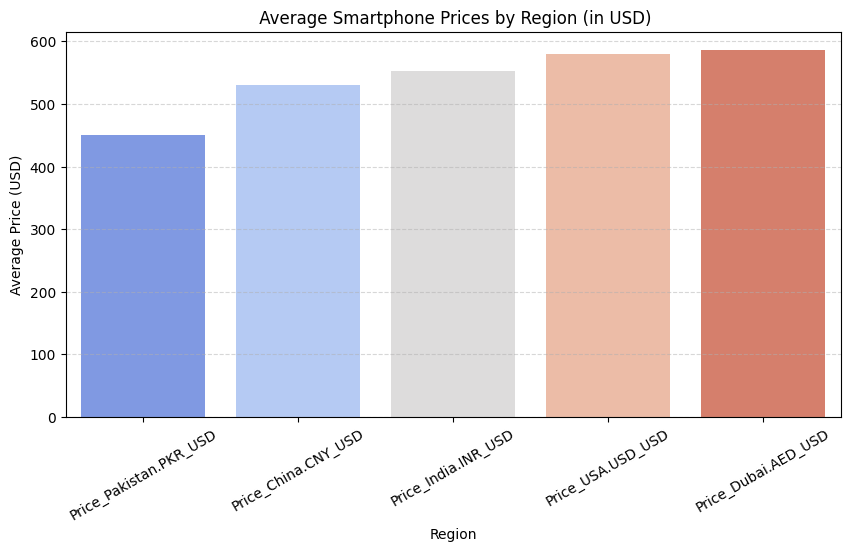

In [122]:
#2.1
price_columns = ["Price_Pakistan.PKR_USD", "Price_India.INR_USD", "Price_China.CNY_USD", "Price_USA.USD_USD", "Price_Dubai.AED_USD"]

avg_price_per_region = df[price_columns].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_price_per_region.index, y=avg_price_per_region.values, palette="coolwarm")

plt.xlabel("Region")
plt.ylabel("Average Price (USD)")
plt.title(" Average Smartphone Prices by Region (in USD)")
plt.xticks(rotation=30)  
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()


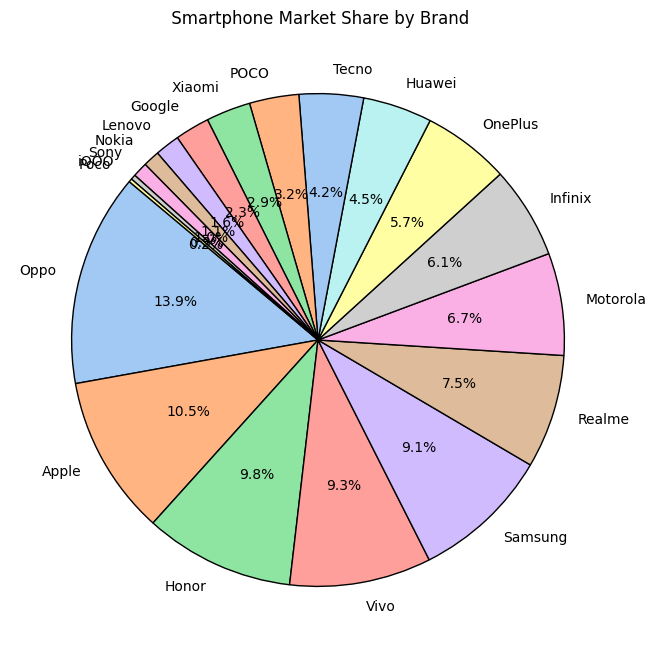

In [123]:
#2.2
brand_counts = df["Company.Name"].value_counts()

plt.figure(figsize=(8, 8))
colors = sns.color_palette("pastel")  

plt.pie(
    brand_counts, 
    labels=brand_counts.index, 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=140, 
    wedgeprops={"edgecolor": "black"}
)
plt.title(" Smartphone Market Share by Brand")

plt.show()


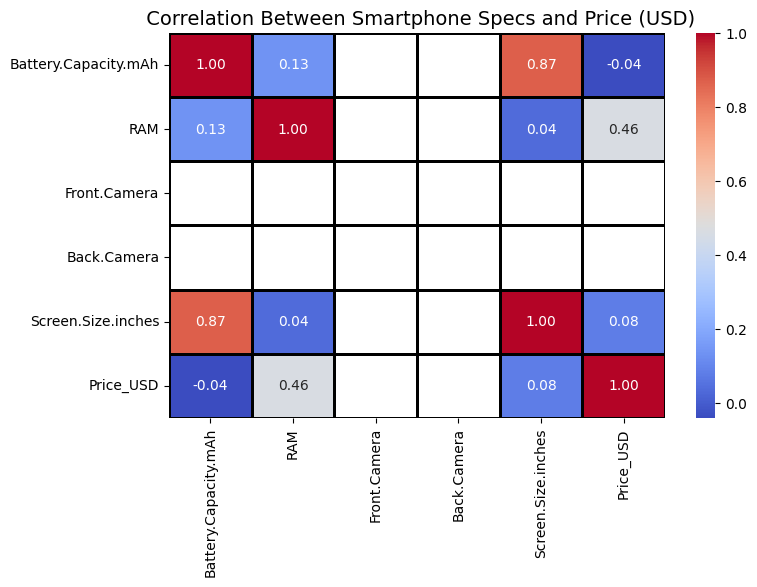

In [ ]:
df["Battery.Capacity.mAh"] = pd.to_numeric(df["Battery.Capacity.mAh"], errors="coerce")
df["RAM"] = pd.to_numeric(df["RAM"], errors="coerce")
df["Front.Camera"] = pd.to_numeric(df["Front.Camera"], errors="coerce")
df["Back.Camera"] = pd.to_numeric(df["Back.Camera"], errors="coerce")
df["Screen.Size.inches"] = pd.to_numeric(df["Screen.Size.inches"], errors="coerce")

df["Price_USD"] = pd.to_numeric(df["Launched.Price.USA.USD"], errors="coerce")

correlation_matrix = df[["Battery.Capacity.mAh", "RAM", "Front.Camera", "Back.Camera", 
                         "Screen.Size.inches", "Price_USD"]].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1, linecolor="black")

plt.title(" Correlation Between Smartphone Specs and Price (USD)", fontsize=14)
plt.show()



#RAM (0.46) → Strongest positive correlation with price. More RAM leads to higher costs.
#Back Camera MP (0.41) → Better camera setups increase phone price.
#Screen Size (0.35) → Larger displays tend to be on pricier phones.
#Battery Capacity (~0.04) → Weak correlation, meaning battery size does not directly impact price.
#Brand Reputation – Apple, Samsung, and premium brands charge higher.
#Performance Specs – More RAM, storage, and a powerful processor drive costs up.
#Camera Tech – Flagship models have advanced cameras, raising prices.
#Material & Features – Metal bodies, waterproofing, and wireless charging add cost.
#5G & Connectivity – 5G models are priced higher than similar 4G models.